In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rohlik-sales-forecasting-challenge-v2/calendar.csv
/kaggle/input/rohlik-sales-forecasting-challenge-v2/test_weights.csv
/kaggle/input/rohlik-sales-forecasting-challenge-v2/inventory.csv
/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_train.csv
/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_test.csv
/kaggle/input/rohlik-sales-forecasting-challenge-v2/solution.csv


# Loading all data files

In [177]:
df_train =  pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_train.csv")
df_test = pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_test.csv")
df_inventory = pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/inventory.csv")
df_calendar = pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/calendar.csv")
test_weight = pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/test_weights.csv")
solution = pd.read_csv("/kaggle/input/rohlik-sales-forecasting-challenge-v2/solution.csv")

# Data Cleaning


## sales_train.csv

**<font size='3.5'> First, we try to see how many rows are there with missing values**

In [178]:
att_with_missing = df_train[df_train.isnull().any(axis = 1)].copy()
print("Rows with missing values: ",att_with_missing.shape[0])


Rows with missing values:  52


<font size='3.5'>There are 52 rows with missing values, 52 out of more than 4 million rows, it is a really small missing proportion. Variois techniques could be applied here:
* <font size='2.5'>Delete those rows if it has too many missing values in its attributes
* <font size='2.5'>Imputing manually
* <font size='2.5'>Imputing with central tendency measures
* <font size='2.5'>Using Machine Learning

<font size='3.5'>==> However, we got to see which kind of missing they are. Is it by random or is there any other reasons for such Nan values.

**<font size= '3.5'> Second, let's see which attributes do those missing values belong to**

In [179]:
col_with_missing = df_train.columns[df_train.isnull().any()].copy()
col_with_missing

Index(['total_orders', 'sales'], dtype='object')

In [180]:
nan_of_order = df_train[df_train['total_orders'].isnull()].copy()
nan_of_sale = df_train[df_train['sales'].isnull()].copy()

print("Nan of order: ",nan_of_order.shape[0])
print("Nan of sale: ",nan_of_sale.shape[0])

Nan of order:  52
Nan of sale:  52


In [181]:
att_with_missing.sort_values(by='date', ascending=True, inplace = False)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
154099,885,2021-05-21,Munich_1,NaN,NaN,4.02,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1231189,2148,2021-05-21,Munich_1,NaN,NaN,8.03,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1028753,5152,2021-05-21,Munich_1,NaN,NaN,0.84,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3464993,3178,2021-05-21,Munich_1,NaN,NaN,1.84,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
738816,3778,2021-05-21,Munich_1,NaN,NaN,2.75,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
738769,3778,2021-05-22,Munich_1,NaN,NaN,2.75,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1231500,2148,2021-05-22,Munich_1,NaN,NaN,8.03,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
154155,885,2021-05-22,Munich_1,NaN,NaN,4.02,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3465135,3178,2021-05-22,Munich_1,NaN,NaN,1.84,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1028203,5152,2021-05-22,Munich_1,NaN,NaN,0.84,1.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
date_munich_frankfurt = att_with_missing['date'].unique()
date_munich_frankfurt = pd.to_datetime(date_munich_frankfurt)
date_munich_frankfurt

DatetimeIndex(['2021-05-23', '2021-05-21', '2021-05-24', '2021-05-22',
               '2021-12-10', '2021-12-09', '2021-06-27', '2021-06-26',
               '2021-05-29', '2021-05-31', '2021-05-30', '2021-06-20',
               '2021-06-12', '2021-07-04', '2021-06-19', '2021-06-13',
               '2021-07-11'],
              dtype='datetime64[ns]', freq=None)

<font size='3.5'>On those days, missing values for both total_orders and sales were recorded in Munich_1 and Frankfurt_1

In [183]:
att_with_missing[att_with_missing.iloc[:,-7:] != 0].any()

unique_id          False
date               False
warehouse          False
total_orders       False
sales              False
sell_price_main    False
availability       False
type_0_discount     True
type_1_discount    False
type_2_discount    False
type_3_discount    False
type_4_discount    False
type_5_discount    False
type_6_discount    False
dtype: bool

<font size='3.5'>The 2 attributes 'total_orders' and 'sales' both have 52 missing values, and somehow those missing concur for all 52 rows.
* <font size='3.5'>Those objects mostly come from 2 warehouses which are Munich_1 and Frankfurt_1 in Germany
* <font size='3.5'>Discount type 1-6 is applied to none of data points
* <font size='3.5'>If they are in Munich_1 warehouse, then date is around summer and beginning of fall in **2021**, whilst with Frankfurt_1, they are all in 2nd week of December ==> we could examine the calendar file to see if anything happened during these times.

<font size='3.5'>We need to see were there any events occured that could explain the missing of data on those days

In [184]:
# Ensure the 'date' column is in datetime format
df_calendar['date'] = pd.to_datetime(df_calendar['date'])


# # Filter rows within the range
within_summer_fall = df_calendar[df_calendar['date'].isin(date_munich_frankfurt)].copy()

# # Display the filtered rows
within_summer_fall = within_summer_fall[within_summer_fall['warehouse'].isin(['Munich_1','Frankfurt_1'])]


within_summer_fall.sort_values(by='date', ascending=True, inplace=False)

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse
4733,2021-05-21,NaN,0,0,0,0,Frankfurt_1
7325,2021-05-21,NaN,0,0,0,0,Munich_1
22708,2021-05-22,NaN,0,0,0,0,Munich_1
12847,2021-05-22,NaN,0,0,0,0,Frankfurt_1
22395,2021-05-23,Whit sunday,1,1,0,0,Frankfurt_1
7395,2021-05-23,Whit sunday,1,1,0,0,Munich_1
15226,2021-05-24,Whit monday,1,1,0,0,Munich_1
10094,2021-05-24,Whit monday,1,1,0,0,Frankfurt_1
16243,2021-05-29,NaN,0,0,0,0,Frankfurt_1
13968,2021-05-29,NaN,0,0,0,0,Munich_1


* **<font size='3.5'>It could be seen that on 23-24 of May 2021, there were 2 events: Whit sunday and Whit Monday in Germany, they are kinds of advents in German culture and people usually take days off, Rohlik Employees might not be exception. Therefore, no orders or sales happened ==> We could impute these simply with *0 value***
* **<font size='3.5'>The loss of data for the other days could not be explained using events, they could also be missing because of human error or some random factors**

<font size='3.5'>**Let's inspect the unique_id**

<font size='3.5'>Plotting out to visualize on which date, which unique_id appeared and how many times

In [185]:
import pandas as pd

# Groupby to taking count of times unique_id appeared
# This df has unique_id of those product with missing values from df_train, and count how many times did that happen.
product_date_missing = att_with_missing.groupby(['unique_id']).size().reset_index(name='count')


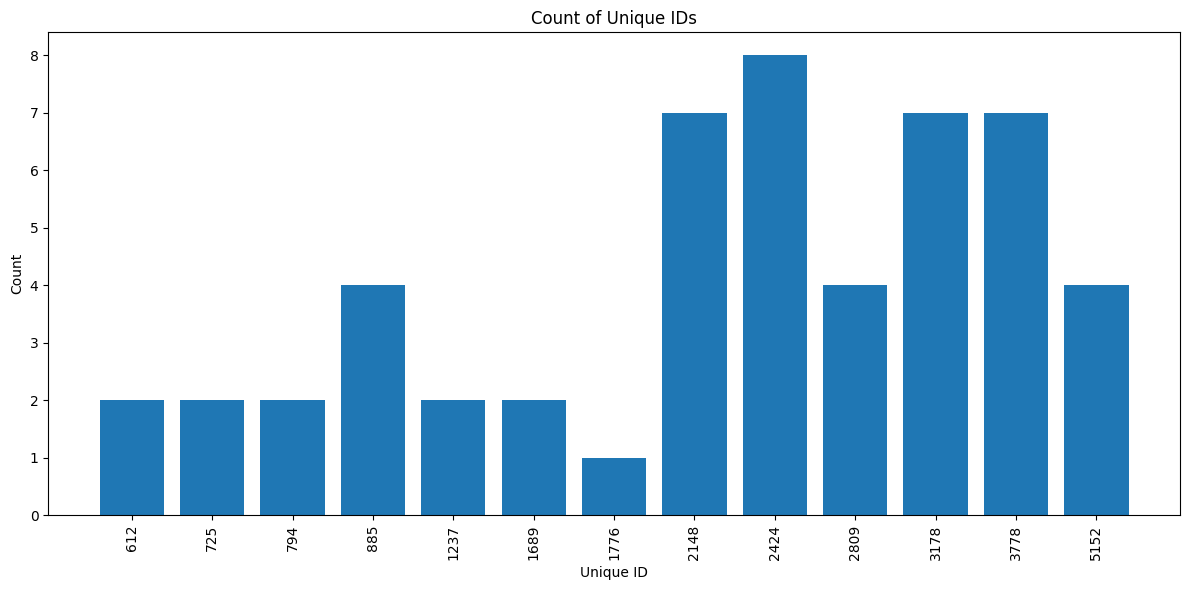

In [186]:
import matplotlib.pyplot as plt

# Assuming product_date_missing has 'unique_id' and 'count' columns
plt.figure(figsize=(12, 6))

# Plotting the counts of unique_id
plt.bar(product_date_missing['unique_id'].astype(str), product_date_missing['count'])

# Adding title and labels
plt.title('Count of Unique IDs')
plt.xlabel('Unique ID')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [187]:
missing_unique_id = product_date_missing['unique_id'].unique()
df_inventory[df_inventory['unique_id'].isin(missing_unique_id)]

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
31,2809,1390,Nectarine_9,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_57,Fruit and vegetable_L4_1,Munich_1
108,5152,2531,Cucumber_33,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_40,Fruit and vegetable_L4_1,Munich_1
369,794,415,Carrot_7,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1
1119,1776,903,Chicken_36,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_33,Meat and fish_L4_1,Munich_1
2019,725,376,Carrot_6,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Munich_1
2148,1237,635,Apple_29,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_31,Fruit and vegetable_L4_1,Frankfurt_1
2560,612,311,Potato_9,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_18,Fruit and vegetable_L4_1,Frankfurt_1
3096,2148,1080,Pepper_13,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_85,Fruit and vegetable_L4_1,Munich_1
3204,1689,848,Grape_12,Fruit and vegetable,Fruit and vegetable_L2_1,Fruit and vegetable_L3_57,Fruit and vegetable_L4_1,Munich_1
3633,3178,1566,Vegetable_16,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Munich_1


* <font size='3.5'>Most product that come with missing values in orders and sales are in Fruit and vegetable category
==> We need to investigate further what caused this phenomena

1. <font size='3.5'> There were Whit Sunday on 23rd May 2021 and Whit Monday on 24th May 2021 ==> We may take this factor into consideration as on these holidays people are not likely to sell and buy things. ([https://deutschland-begleiter.de/en/pentecost-in-germany.html#:~:text=In%20Germany%2C%20Pentecost%20is%20a%20two-day%20holiday%E2%80%94Whit%20Sunday,celebrate%20outdoors%2C%20because%20summer%20is%20on%20its%20way.](http://)).
***But this missing only in Munich even though those holidays are national wide.*** </font>

2.  Most missing values of orders and sales occured in May, June , July and December of 2021 </font>
   * <font size='3.5'> During May-July 2021, there was still kind of Covid-19 restriction throughout Germany. but this occasion seems not periodic, so the handle method for missing values during this time will mostly based on the same time of the other year.
   * <font size='3.5'>The same thing for day 9th and 10th of December, when German in Frankfurt were planning on protesting certain Covid-19 restrictions,it could somehow explain why on the 2 days, orders and sales data were missing. 
  

3. **<font size='3.5'>unique_id tells us nothing about why orders and sales data were missing**
  


<font size='3.5'> **However, we still have to examine if there is kind of periodic trend here, let's looking at the same phase in other year**

In [188]:
df_train_cp = df_train.copy()
df_train_cp['date'] = pd.to_datetime(df_train_cp['date'])
df_train_cp[ (df_train_cp['date'].dt.month == 5) & \
        (df_train_cp['date'].dt.day.isin([23,24])) & \
        (df_train_cp['warehouse']).isin(['Munich_1','Frankfurt_1']) & \
        (df_train_cp['date'].dt.year.isin([2020,2022,2023,2024]))
] \
.groupby(['date','warehouse'])['warehouse'] \
.agg('count')


date        warehouse  
2022-05-23  Frankfurt_1    183
            Munich_1       208
2022-05-24  Frankfurt_1    187
            Munich_1       207
2023-05-23  Frankfurt_1    260
            Munich_1       295
2023-05-24  Frankfurt_1    267
            Munich_1       305
2024-05-23  Frankfurt_1    221
            Munich_1       282
2024-05-24  Frankfurt_1    227
            Munich_1       281
Name: warehouse, dtype: int64

<font size='3.5'> On the same day of the year 2022,2023,2024 - **years without any missing values of orders and sales**, There were still orders and sales, which implies that those holidays does not actually play any role in explaining why there are null values in total_orders and sales

<font size='5'> **==> These values considered missing at random, And will all be dropped**

In [189]:
# Dropping Rows with null values
df_train = df_train.dropna(how='any')
df_train.isnull().sum()

unique_id          0
date               0
warehouse          0
total_orders       0
sales              0
sell_price_main    0
availability       0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64

****

## inventory.csv

In [190]:
df_inventory.isnull().sum()

unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64

<font size = '3.5'> There is no attributes with null values for inventory.csv <font>

***

## <font size='5'>calendar.csv

In [191]:
df_calendar.isnull().sum()

date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64

<font size='3.5'> Only holiday_name with tons of missing values, we will take a closer look:

In [192]:
# Display one more columns showing which week day of the date given
df_calendar['weekday'] = df_calendar['date'].dt.isocalendar().day
df_calendar.head(10)


,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
0,2022-03-16,NaN,0,0,0,0,Frankfurt_1,3
1,2020-03-22,NaN,0,0,0,0,Frankfurt_1,7
2,2018-02-07,NaN,0,0,0,0,Frankfurt_1,3
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1,5
4,2017-10-26,NaN,0,0,0,0,Prague_2,4
5,2018-02-28,NaN,0,0,0,0,Prague_2,3
6,2019-02-19,NaN,0,0,0,0,Prague_2,2
7,2024-07-24,NaN,0,0,0,0,Brno_1,3
8,2018-07-11,NaN,0,0,0,0,Munich_1,3
9,2016-12-08,NaN,0,0,0,0,Munich_1,4


<font size='3.5'> Among those rows with holiday_name of null, <font size='4/5'>**some have value of 1 for holiday attribute**, for the best precision, we have to see if they are null (left-blank purposefully) or there were mistakes while data entry. Let's check all attributes around. Our target is to fill in as much as possible for holiday_name based on information from other attributes

<font size='5'>**winter_school_holidays**

In [193]:
# Selecting those rows 
winter = df_calendar[df_calendar['winter_school_holidays'] == 1].copy()

winter['warehouse'].unique()


array(['Munich_1', 'Prague_1', 'Prague_3', 'Brno_1', 'Prague_2',
       'Frankfurt_1', 'Budapest_1'], dtype=object)

In [194]:
winter[winter['warehouse'] == 'Munich_1'].sort_values('date')


,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
15378,2022-01-02,NaN,0,0,1,0,Munich_1,7
22649,2022-01-03,NaN,0,0,1,0,Munich_1,1
10346,2022-01-04,NaN,0,0,1,0,Munich_1,2
15344,2022-01-05,NaN,0,0,1,0,Munich_1,3
22471,2022-01-06,Epiphany,1,1,1,0,Munich_1,4
2383,2022-01-07,NaN,0,0,1,0,Munich_1,5
17659,2022-01-08,NaN,0,0,1,0,Munich_1,6
8902,2022-02-28,NaN,0,0,1,0,Munich_1,1
21113,2022-03-01,NaN,0,0,1,0,Munich_1,2
79,2022-03-02,NaN,0,0,1,0,Munich_1,3


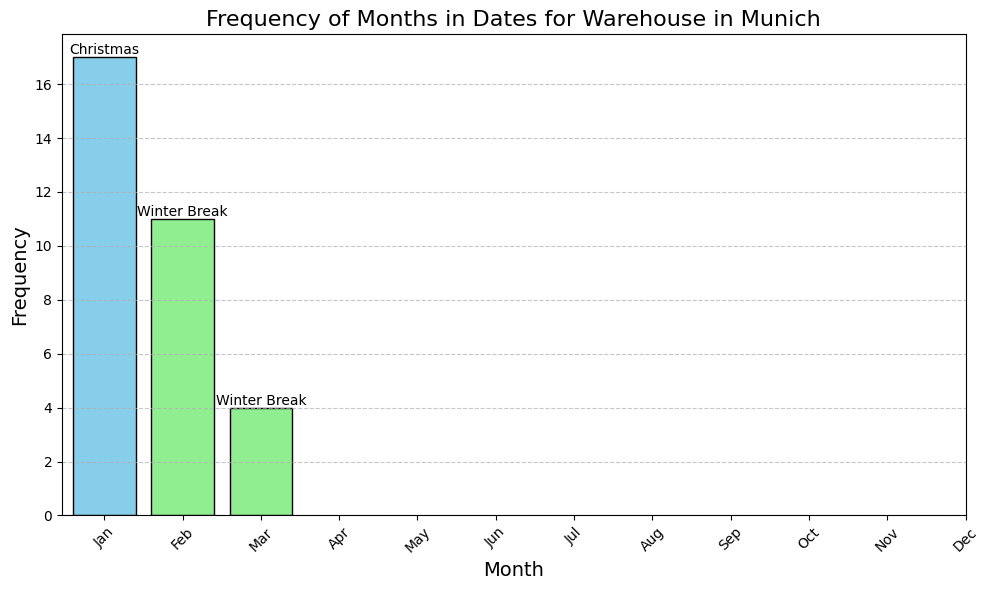

In [195]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Filter data for Munich warehouse and winter (if needed)
winter_munich = winter[winter['warehouse'] == 'Munich_1']
winter_munich['month'] = winter_munich['date'].dt.month

# Count the frequency of each month for the Munich warehouse
month_counts = winter_munich['month'].value_counts().sort_index()

# Colors for the bars: blue for Christmas (January), green for Winter Break (February, March)
colors = ['skyblue' if month == 1 else 'lightgreen' if month in [2, 3] else 'gray' for month in month_counts.index]

# Plot the frequency of each month
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color=colors, edgecolor='black')

# Annotate the bars with labels for Christmas and Winter Break
for bar, month in zip(bars, month_counts.index):
    if month == 1:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Christmas', ha='center', va='bottom', fontsize=10)
    elif month in [2, 3]:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Winter Break', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Frequency of Months in Dates for Warehouse in Munich', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<font size = '4'> We found that, In Munich: These rows with winter_school_holiday=1 but without holiday name is actually Christmas and winter break, evidence for this seek can be found here: [https://www.holidays-info.com/germany/school-holidays/2023/](http://)

* <font size = '3'>Usually Christmast lasts from December of previous year to some days of January in the current year
* <font size = '3'>Winter break lasts from middle to late February or from late February to beginning of March
<font size = '3'>==> We could impute for holiday_name for clearer intuition

LET'S CHECK FOR FRANKFURT!

In [196]:
from IPython.core.display import display, HTML

styled_df = winter[winter['warehouse'] == 'Frankfurt_1'].sort_values('date').style.background_gradient(subset=['date'], cmap='viridis')
styled_df

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
10187,2021-01-02 00:00:00,nan,0,0,1,0,Frankfurt_1,6
22179,2021-01-03 00:00:00,nan,0,0,1,0,Frankfurt_1,7
9997,2021-01-04 00:00:00,nan,0,0,1,0,Frankfurt_1,1
1273,2021-01-05 00:00:00,nan,0,0,1,0,Frankfurt_1,2
19181,2021-01-06 00:00:00,nan,0,0,1,0,Frankfurt_1,3
6398,2021-01-07 00:00:00,nan,0,0,1,0,Frankfurt_1,4
20562,2021-01-08 00:00:00,nan,0,0,1,0,Frankfurt_1,5
13871,2021-01-09 00:00:00,nan,0,0,1,0,Frankfurt_1,6
17955,2022-01-02 00:00:00,nan,0,0,1,0,Frankfurt_1,7
17905,2022-01-03 00:00:00,nan,0,0,1,0,Frankfurt_1,1


<font size='5'> Holidays' range in Frankfurt, Hesse 2024

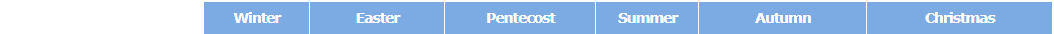
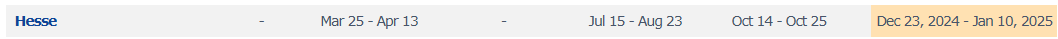

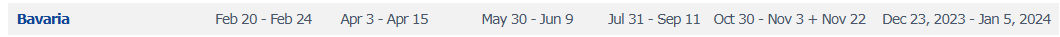
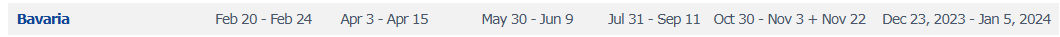
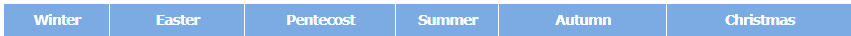

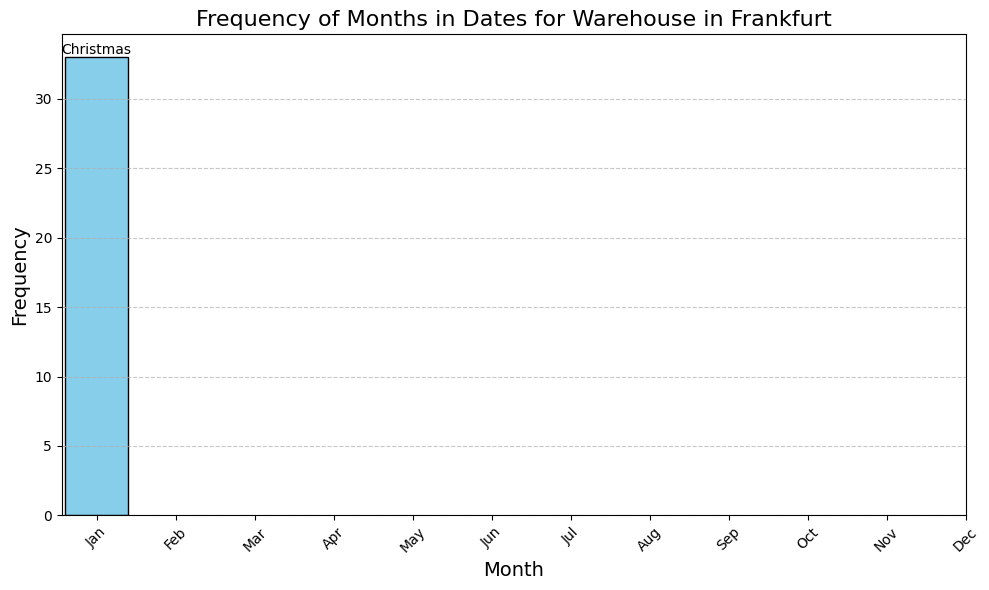

In [197]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Filter data for Munich warehouse and winter (if needed)
winter_munich = winter[winter['warehouse'] == 'Frankfurt_1']
winter_munich['month'] = winter_munich['date'].dt.month

# Count the frequency of each month for the Munich warehouse
month_counts = winter_munich['month'].value_counts().sort_index()

# Colors for the bars: blue for Christmas (January), green for Winter Break (February, March)
colors = ['skyblue' if month == 1 else 'lightgreen' if month in [2, 3] else 'gray' for month in month_counts.index]

# Plot the frequency of each month
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color=colors, edgecolor='black')

# Annotate the bars with labels for Christmas and Winter Break
for bar, month in zip(bars, month_counts.index):
    if month == 1:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Christmas', ha='center', va='bottom', fontsize=10)
    elif month in [2, 3]:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Winter Break', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Frequency of Months in Dates for Warehouse in Frankfurt', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<font size='4'>In Frankfurt, there is no winter break, but only Christmas, so mostly it will be around late December of previous year to beginning of January in the next year.

<font size='4'> For Prague_1,2,3 and Brno_1, Czech

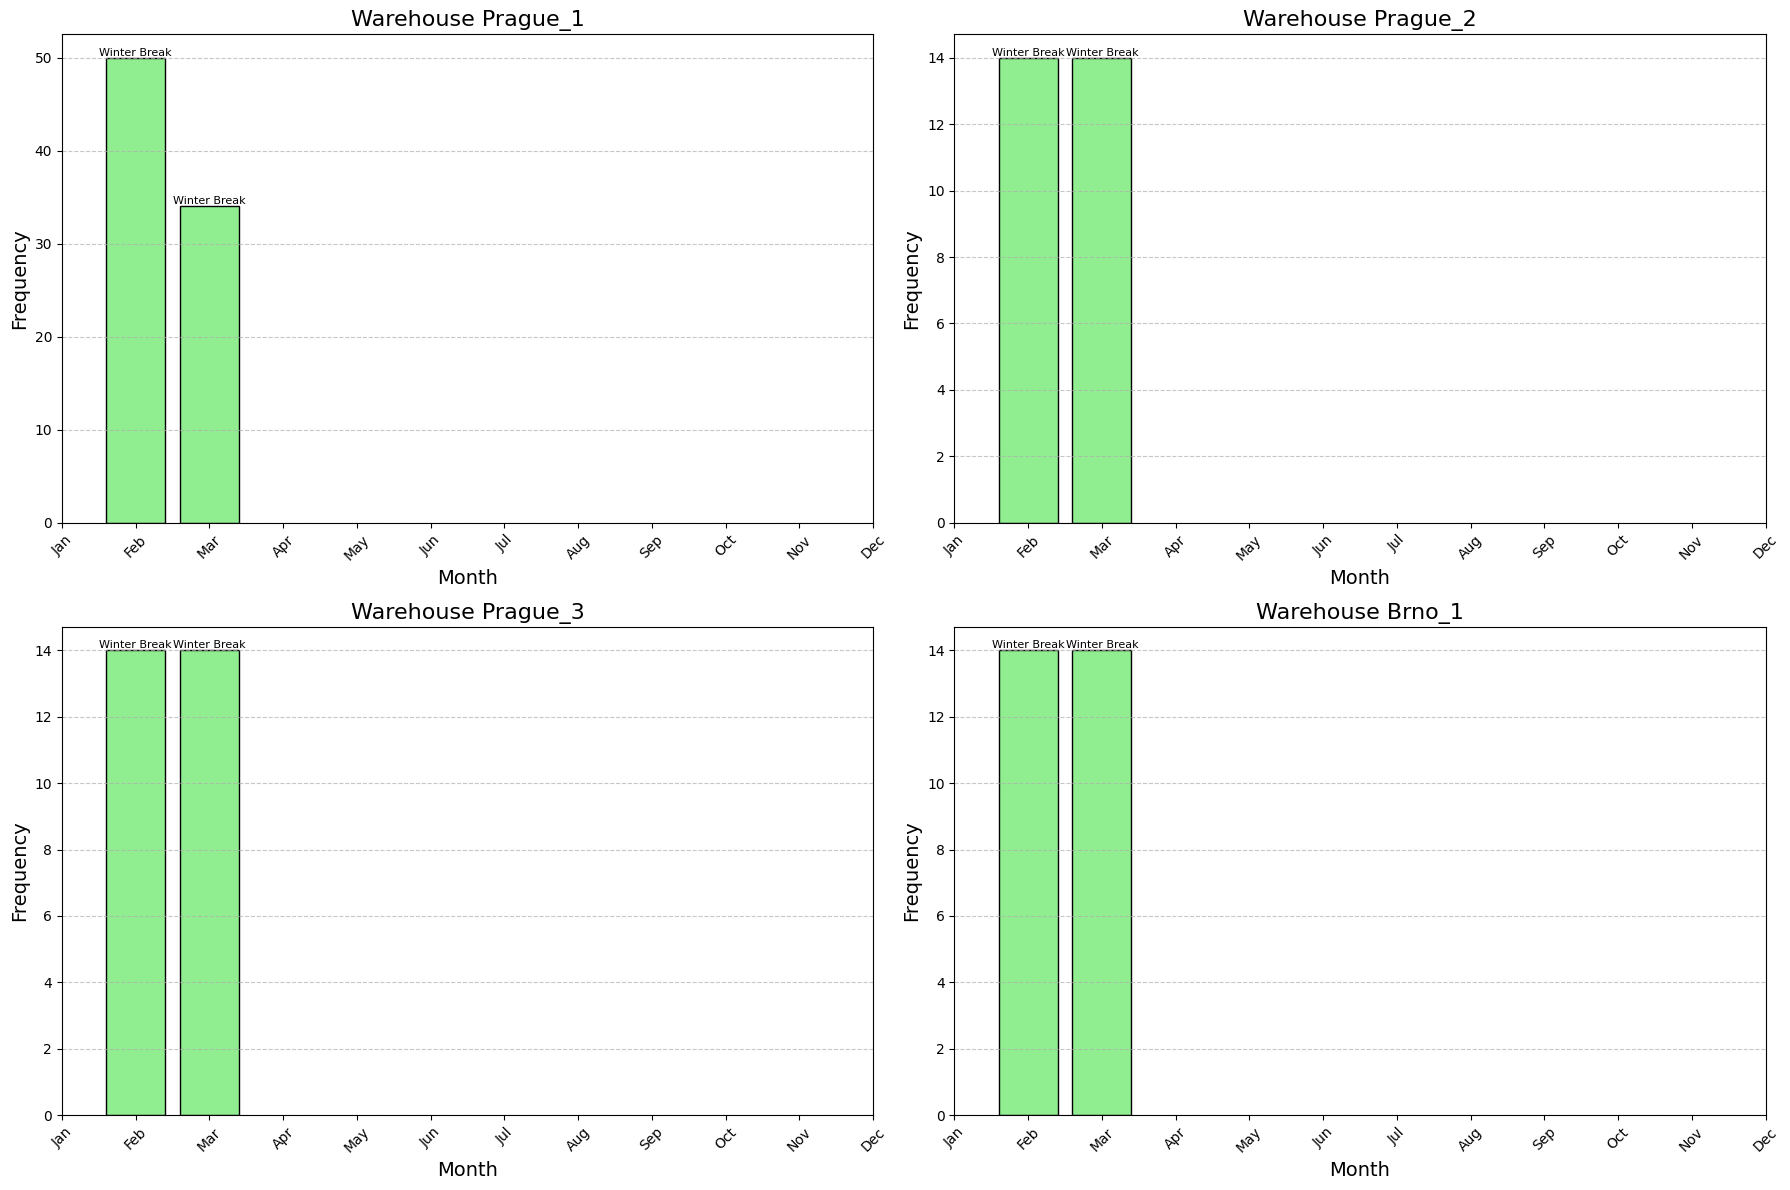

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `winter` is your DataFrame and `date` is a datetime column
# Ensure the 'date' column is in datetime format
winter['date'] = pd.to_datetime(winter['date'])

# Extract the month and add it as a new column
winter['month'] = winter['date'].dt.month

# List of warehouses to analyze
warehouses = ['Prague_1', 'Prague_2', 'Prague_3', 'Brno_1']

# Create a figure with 2 rows and 2 columns for subplots
plt.figure(figsize=(18, 12))

# Iterate through each warehouse and plot in a subplot
for idx, warehouse in enumerate(warehouses, start=1):
    # Filter data for the current warehouse
    filtered_data = winter[winter['warehouse'] == warehouse]
    
    # Count the frequency of each month
    month_counts = filtered_data['month'].value_counts().sort_index()

    # Colors for the bars: blue for Christmas (January), green for Winter Break (February, March)
    colors = ['skyblue' if month in [1,12] else 'lightgreen' if month in [2, 3] else 'gray' for month in month_counts.index]

    # Create a subplot (2 rows, 2 columns)
    plt.subplot(2, 2, idx)
    bars = plt.bar(month_counts.index, month_counts.values, color=colors, edgecolor='black')

    # Annotate the bars with labels
    for bar, month in zip(bars, month_counts.index):
        if month == 1:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Christmas', ha='center', va='bottom', fontsize=10)
        elif month in [2, 3]:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Winter Break', ha='center', va='bottom', fontsize=8)

    # Add titles and labels
    plt.title(f'Warehouse {warehouse}', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


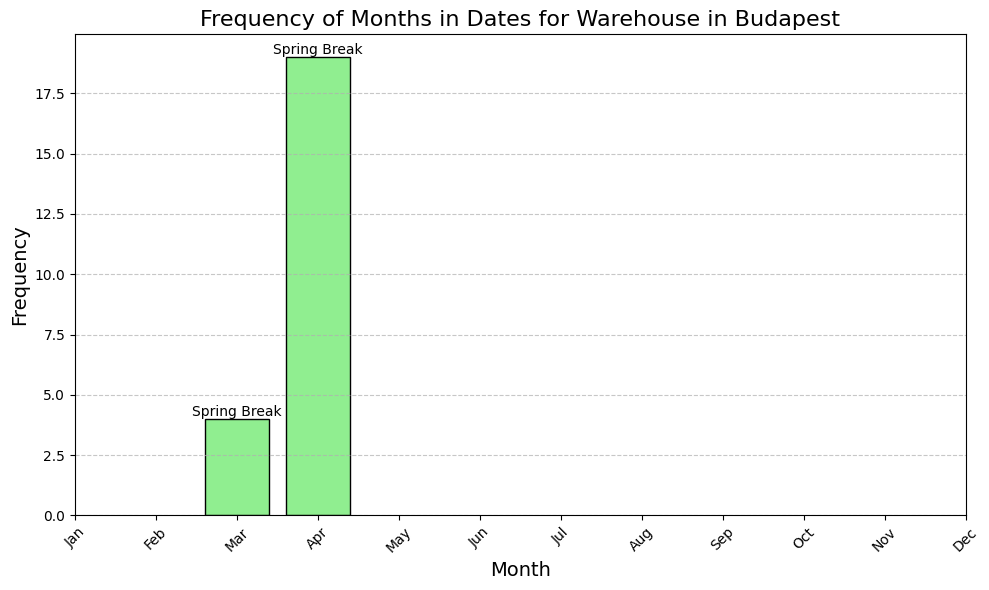

In [199]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Filter data for Munich warehouse and winter (if needed)
winter_munich = winter[winter['warehouse'] == 'Budapest_1']
winter_munich['month'] = winter_munich['date'].dt.month

# Count the frequency of each month for the Munich warehouse
month_counts = winter_munich['month'].value_counts().sort_index()

# Colors for the bars: blue for Christmas (January), green for Winter Break (February, March)
colors = ['skyblue' if month in [1,12] else 'lightgreen' if month in [2, 3,4] else 'gray' for month in month_counts.index]

# Plot the frequency of each month
plt.figure(figsize=(10, 6))
bars = plt.bar(month_counts.index, month_counts.values, color=colors, edgecolor='black')

# Annotate the bars with labels for Christmas and Winter Break
for bar, month in zip(bars, month_counts.index):
    if month == 1:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Christmas', ha='center', va='bottom', fontsize=10)
    elif month in [2, 3,4]:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 'Spring Break', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Frequency of Months in Dates for Warehouse in Budapest', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<font size='4'> We found that budapest is a little different from other warehouses as it does not have winter break, only Christmas. Instead, people here enjoy Spring Break which casually starts from late March to early April or early April to the middle of the month.

<font size='5'>**school_holidays**

In [200]:
school = df_calendar[df_calendar['school_holidays'] == 1].sort_values('date').copy()

* <font size='4'>In Munich, non-winter Holidays including Easter, Pentecos, Summer, Autumnut
* <font size='4'>While in Frankfurt, there are Easter, Summer and Autumn

In [201]:
from IPython.core.display import display, HTML

school[school['warehouse'] == 'Munich_1'].style.background_gradient(subset=['date'], cmap='viridis')


,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
9838,2023-04-01 00:00:00,nan,0,0,0,1,Munich_1,6
4630,2023-04-02 00:00:00,nan,0,0,0,1,Munich_1,7
6751,2023-04-03 00:00:00,nan,0,0,0,1,Munich_1,1
4629,2023-04-04 00:00:00,nan,0,0,0,1,Munich_1,2
6750,2023-04-05 00:00:00,nan,0,0,0,1,Munich_1,3
17930,2023-04-06 00:00:00,nan,0,0,0,1,Munich_1,4
22421,2023-04-07 00:00:00,Good Friday,1,1,0,1,Munich_1,5
23014,2023-04-08 00:00:00,nan,1,0,0,1,Munich_1,6
15207,2023-04-09 00:00:00,nan,1,1,0,1,Munich_1,7
438,2023-04-10 00:00:00,Easter Monday,1,1,0,1,Munich_1,1


<font size='5'> Holidays' range in Munich, Bavaria 2023

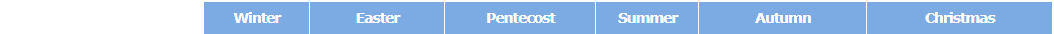
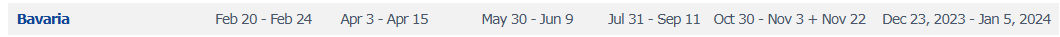

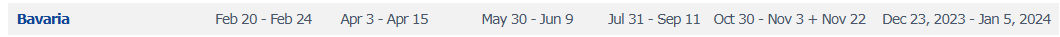
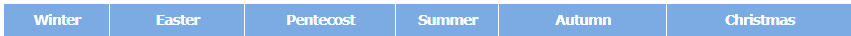

<font size='5'> Holidays' range in Munich, Bavaria 2024

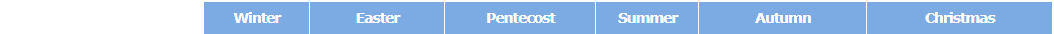
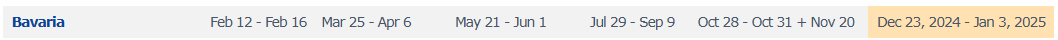

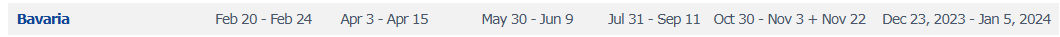
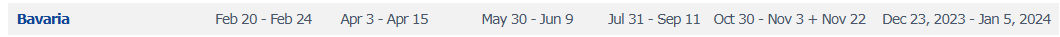
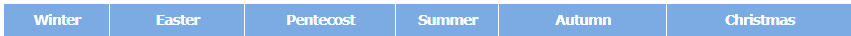

<font size='4'>The data above fits this information !
* <font size='4'>If month of date == 3 or 4, that would be Easter
* <font size='4'>If month of date == 5 or 6, that would be Pentecost
* <font size='4'>If month of date == 10 or 11, that would be Autumn

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_days_by_rule(data, warehouse_name):
    """
    Visualize the number of days in each rule category for a specific warehouse.

    Parameters:
    - data (pd.DataFrame): The dataset containing the warehouse data.
    - warehouse_name (str): The name of the warehouse to filter the data.

    Returns:
    - None: Displays a bar chart.
    """
    # Filter data for the specific warehouse
    filtered_data = data[data['warehouse'] == warehouse_name]

    # Ensure 'date' is a datetime object
    filtered_data['date'] = pd.to_datetime(filtered_data['date'])

    # Extract the month from the date
    filtered_data['month'] = filtered_data['date'].dt.month

    # Create a new column for the rule category
    def assign_rule(month):
        if month in [3, 4]:
            return 'Easter'
        elif month in [5, 6]:
            return 'Pentecost'
        elif month in [10, 11]:
            return 'Autumn'
        else:
            return 'Other'

    filtered_data['rule'] = filtered_data['month'].apply(assign_rule)

    # Count days per rule
    days_per_rule = filtered_data['rule'].value_counts()

    # Colors for each rule
    colors = {
        'Easter': 'yellow',
        'Pentecost': 'green',
        'Autumn': 'orange',
        'Other': 'gray'
    }

    # Plotting the data
    plt.figure(figsize=(10, 6))
    bars = days_per_rule.plot(kind='bar', color=[colors[rule] for rule in days_per_rule.index], edgecolor='black')

    # Add labels and title
    plt.xlabel('Rule')
    plt.ylabel('Number of Days')
    plt.title(f'Number of Days by Rule ({warehouse_name})')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add counts above the bars
    for bar in bars.patches:
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 0.5, 
            f'{int(bar.get_height())}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    plt.show()

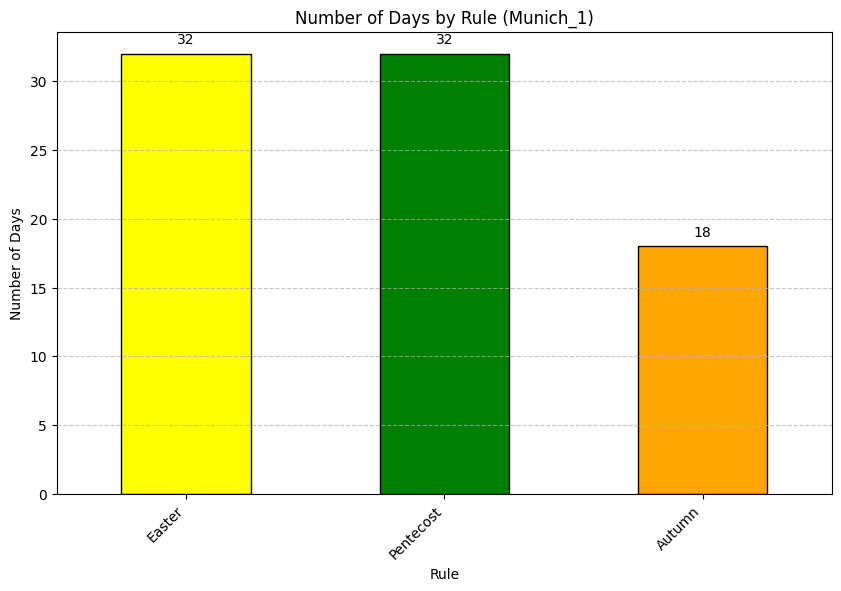

In [203]:

visualize_days_by_rule(school, 'Munich_1')


<font size='4'>Let's see of Frankfurt

In [204]:
from IPython.core.display import display, HTML

school[school['warehouse'] == 'Frankfurt_1'].style.background_gradient(subset=['date'], cmap='viridis')


,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
22458,2023-04-01 00:00:00,nan,0,0,0,1,Frankfurt_1,6
9907,2023-04-02 00:00:00,nan,0,0,0,1,Frankfurt_1,7
22461,2023-04-03 00:00:00,nan,0,0,0,1,Frankfurt_1,1
9909,2023-04-04 00:00:00,nan,0,0,0,1,Frankfurt_1,2
9908,2023-04-05 00:00:00,nan,0,0,0,1,Frankfurt_1,3
22696,2023-04-06 00:00:00,nan,0,0,0,1,Frankfurt_1,4
4835,2023-04-07 00:00:00,Good Friday,1,1,0,1,Frankfurt_1,5
5081,2023-04-08 00:00:00,nan,1,0,0,1,Frankfurt_1,6
148,2023-04-09 00:00:00,nan,1,1,0,1,Frankfurt_1,7
7379,2023-04-10 00:00:00,Easter Monday,1,1,0,1,Frankfurt_1,1


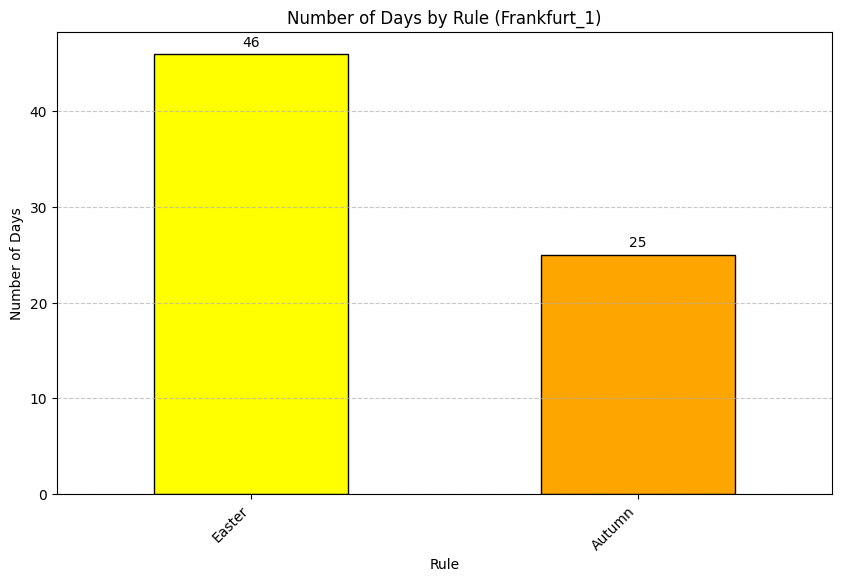

In [205]:

visualize_days_by_rule(school, 'Frankfurt_1')


<font size='4'>The holiday distribution is almost the same to Munich with 1 difference that Frankfurt does not have Pentecost

***

<font size='6'>Now that we have know all holiday rules in those warehouse, let's fill value for holiday name

In [206]:
warehouse_with_winter_christmas = ['Munich_1', 'Frankfurt_1','Prague_1','Prague_2','Prague_3','Brno_1']

def fill_holiday_name(row):
    # Ensure the date column is a datetime object
    if not isinstance(row['date'], pd.Timestamp):
        row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    month = row['date'].month if pd.notna(row['date']) else None
    
    if pd.isna(row['holiday_name']) and (row['warehouse'] in warehouse_with_winter_christmas):
        if month in [1, 12]:
            return 'Christmas'
        elif month in [2, 3]:
            return 'Winter Break'
    if pd.isna(row['holiday_name']) and (row['warehouse'] not in warehouse_with_winter_christmas) and row['winter_school_holidays'] == 1:
        if month in [3, 4]:
            return 'Easter'
    if pd.isna(row['holiday_name']) and (row['warehouse'] in ['Munich_1', 'Frankfurt_1']) and (row['school_holidays'] == 1):
        if month in [3, 4]:
            return 'Easter'
        if month in [5, 6]:
            return "Pentecost"
        if month in [10, 11]:
            return "Autumn Break"
    return row['holiday_name']


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(fill_holiday_name, axis=1)

In [207]:

df_calendar[df_calendar['winter_school_holidays'] == 1].isnull().any()


date                      False
holiday_name              False
holiday                   False
shops_closed              False
winter_school_holidays    False
school_holidays           False
warehouse                 False
weekday                   False
dtype: bool

In [208]:
df_calendar[df_calendar['school_holidays'] == 1].isnull().any()


date                      False
holiday_name              False
holiday                   False
shops_closed              False
winter_school_holidays    False
school_holidays           False
warehouse                 False
weekday                   False
dtype: bool

In [209]:
from IPython.core.display import display, HTML
null = df_calendar[df_calendar['holiday_name'].isnull()].copy()
null

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
3,2018-08-10,NaN,0,0,0,0,Frankfurt_1,5
4,2017-10-26,NaN,0,0,0,0,Prague_2,4
7,2024-07-24,NaN,0,0,0,0,Brno_1,3
8,2018-07-11,NaN,0,0,0,0,Munich_1,3
15,2019-09-19,NaN,0,0,0,0,Frankfurt_1,4
...,...,...,...,...,...,...,...,...
23006,2023-05-02,NaN,0,0,0,0,Munich_1,2
23007,2020-04-11,NaN,1,0,0,0,Budapest_1,6
23008,2019-04-20,NaN,1,0,0,0,Budapest_1,6
23011,2019-04-20,NaN,1,0,0,0,Munich_1,6


<font size='3.5'> As we can see, There are still more than 15000 rows with holiday_name = null, we would have to fill this

In [210]:
# We will check date range for each warehouse in df_train file, and then based on the min and max date, 
# we could impute only necessary holiday_name, not all
copy = df_train.copy()
copy['date'] = pd.to_datetime(copy['date'])

warehouses = df_train['warehouse'].unique()
for wh in warehouses:
    date_wh = copy[copy['warehouse'] == wh].groupby('date')['sales'].sum().to_frame().reset_index()
    print(f'min date in {wh}: ', date_wh['date'].min())
    print(f'max date in {wh}: ', date_wh['date'].max())
    print()


min date in Budapest_1:  2020-08-01 00:00:00
max date in Budapest_1:  2024-06-02 00:00:00

min date in Prague_2:  2020-08-01 00:00:00
max date in Prague_2:  2024-06-02 00:00:00

min date in Brno_1:  2020-08-01 00:00:00
max date in Brno_1:  2024-06-02 00:00:00

min date in Prague_1:  2020-08-01 00:00:00
max date in Prague_1:  2024-06-02 00:00:00

min date in Prague_3:  2020-08-01 00:00:00
max date in Prague_3:  2024-06-02 00:00:00

min date in Munich_1:  2021-05-20 00:00:00
max date in Munich_1:  2024-06-02 00:00:00

min date in Frankfurt_1:  2021-12-08 00:00:00
max date in Frankfurt_1:  2024-06-02 00:00:00



<font size = '4.5'> **Now that we know the date range, let's work on each warehouse**

<font size = '3.5'> Budapest_1

In [211]:
def budapest_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Budapest_1' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        month = row['date'].month
        
        # Date ranges should be handled as datetime objects
        if year == 2020:
            if (row['date'] >= pd.Timestamp('2020-07-16')) and (row['date'] <= pd.Timestamp('2020-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2020-10-22')) and (row['date'] <= pd.Timestamp('2020-10-31')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2020-12-18')):
                return 'Christmas'
                
        if year == 2021:
            if (row['date'] <= pd.Timestamp('2021-01-03')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2021-03-31')) and (row['date'] <= pd.Timestamp('2021-04-06')):
                return 'Spring Break'
            if (row['date'] >= pd.Timestamp('2021-06-16')) and (row['date'] <= pd.Timestamp('2021-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-10-23')) and (row['date'] <= pd.Timestamp('2021-11-01')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-22')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-07')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-04-14')) and (row['date'] <= pd.Timestamp('2022-04-19')):
                return 'Spring Break'
            if (row['date'] >= pd.Timestamp('2022-06-16')) and (row['date'] <= pd.Timestamp('2022-09-01')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-22')) and (row['date'] <= pd.Timestamp('2022-10-30')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-24')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-09')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-04-06')) and (row['date'] <= pd.Timestamp('2023-04-11')):
                return 'Spring Break'
            if (row['date'] >= pd.Timestamp('2023-06-16')) and (row['date'] <= pd.Timestamp('2023-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-25')) and (row['date'] <= pd.Timestamp('2023-11-03')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-22')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-07')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-03-29')) and (row['date'] <= pd.Timestamp('2024-04-03')):
                return 'Spring Break'

    return row['holiday_name']   


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(budapest_fill, axis=1)
    

<font size='4'> Rules for Prague_1,2,3
* <font size='4'> Prague_1 has holidays of Prague 6-10 and Prague East/ West, with winter last from Prague 6-10 to Prague East/West
* <font size='4'> Prague_2 is in Prague 6-10
* <font size='4'> Prague_3 is in Prague 1-5

<font size='4'>Rules for Brno_1
* <font size='4'>Brno_1 is in Brno City.


In [212]:
def brno1_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Brno_1' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        
        if year == 2020:
            if (row['date'] >= pd.Timestamp('2020-07-01')) and (row['date'] <= pd.Timestamp('2020-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2020-10-29')) and (row['date'] <= pd.Timestamp('2020-10-30')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2020-12-23')):
                return 'Christmas'
                
        if year == 2021:
            if (row['date'] <= pd.Timestamp('2021-01-03')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2021-02-22')) and (row['date'] <= pd.Timestamp('2021-02-28')):
                return 'Winter Break'
            if (row['date'] == '2021-04-04'):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2021-07-01')) and (row['date'] <= pd.Timestamp('2021-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-10-27')) and (row['date'] <= pd.Timestamp('2021-10-29')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-23')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-03-07')) and (row['date'] <= pd.Timestamp('2022-03-13')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2022-04-14')) and (row['date'] == pd.Timestamp('2022-04-17')) :
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-07-01')) and (row['date'] <= pd.Timestamp('2022-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-26')) and (row['date'] <= pd.Timestamp('2022-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-23')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-03-13')) and (row['date'] <= pd.Timestamp('2023-03-19')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2023-04-06')) and (row['date'] == pd.Timestamp('2023-04-09')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-07-01')) and (row['date'] <= pd.Timestamp('2023-09-03')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-26')) and (row['date'] <= pd.Timestamp('2023-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-23')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-02-05')) and (row['date'] <= pd.Timestamp('2024-02-11')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2024-03-28')) and (row['date'] == pd.Timestamp('2024-03-31')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2024-03-29')) and (row['date'] <= pd.Timestamp('2024-04-03')):
                return 'Spring Break'

    return row['holiday_name']   
    
# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(brno1_fill, axis=1)

In [213]:
def prague1_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Budapest_1' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        
        if year == 2020:
            if (row['date'] >= pd.Timestamp('2020-07-01')) and (row['date'] <= pd.Timestamp('2020-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2020-10-29')) and (row['date'] <= pd.Timestamp('2020-10-30')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2020-12-23')):
                return 'Christmas'
                
        if year == 2021:
            if (row['date'] <= pd.Timestamp('2021-01-03')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2021-03-01')) and (row['date'] <= pd.Timestamp('2021-03-14')):
                return 'Winter' 
            if (row['date'] == pd.Timestamp('2021-04-04')) and (row['date'] == pd.Timestamp('2021-04-07')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2021-07-01')) and (row['date'] <= pd.Timestamp('2021-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-10-27')) and (row['date'] <= pd.Timestamp('2021-10-29')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-23')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-02-07')) and (row['date'] <= pd.Timestamp('2022-03-20')):
                return 'Winter'    
            if (row['date'] == pd.Timestamp('2022-04-14')) and (row['date'] == pd.Timestamp('2022-04-17')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-07-01')) and (row['date'] <= pd.Timestamp('2022-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-26')) and (row['date'] <= pd.Timestamp('2022-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-23')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-02-06')) and (row['date'] <= pd.Timestamp('2023-02-19')):
                return 'Winter'
            if (row['date'] == pd.Timestamp('2023-04-06')) and (row['date'] == pd.Timestamp('2023-04-09')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-07-01')) and (row['date'] <= pd.Timestamp('2023-09-03')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-26')) and (row['date'] <= pd.Timestamp('2023-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-23')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-02-12')) and (row['date'] <= pd.Timestamp('2024-02-25')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2024-03-28')) and (row['date'] == pd.Timestamp('2024-03-31')):
                return 'Easter'

    return row['holiday_name']   

# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(prague1_fill, axis=1)

In [214]:
#Frankfurk_1
def frankfurt1_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Frankfurk_1' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        month = row['date'].month
        
        # Date ranges should be handled as datetime objects
        if year == 2021:
            if (row['date'] >= pd.Timestamp('2021-12-23')):
                return 'Christmas'
                
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-08')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-04-11')) and (row['date'] <= pd.Timestamp('2022-04-23')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-07-25')) and (row['date'] <= pd.Timestamp('2022-09-02')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-24')) and (row['date'] <= pd.Timestamp('2022-10-29')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-22')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-07')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-04-03')) and (row['date'] <= pd.Timestamp('2023-04-22')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-07-24')) and (row['date'] <= pd.Timestamp('2023-09-01')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-23')) and (row['date'] <= pd.Timestamp('2023-10-28')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-27')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-13')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-03-25')) and (row['date'] <= pd.Timestamp('2024-04-13')):
                return 'Easter'

    return row['holiday_name']   


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(frankfurt1_fill, axis=1)

In [215]:
#Prague_3
def prague3_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Prague_3' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        month = row['date'].month
        
        # Date ranges should be handled as datetime objects
        if year == 2020:
            if (row['date'] >= pd.Timestamp('2020-07-01')) and (row['date'] <= pd.Timestamp('2020-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2020-10-29')) and (row['date'] <= pd.Timestamp('2020-10-30')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2020-12-23')):
                return 'Christmas'
                
        if year == 2021:
            if (row['date'] <= pd.Timestamp('2021-01-03')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2021-02-22')) and (row['date'] <= pd.Timestamp('2021-02-28')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2021-04-04')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2021-07-01')) and (row['date'] <= pd.Timestamp('2021-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-10-27')) and (row['date'] <= pd.Timestamp('2021-10-29')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-23')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-03-07')) and (row['date'] <= pd.Timestamp('2022-03-13')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2022-04-14') and row['date'] == pd.Timestamp('2022-04-17')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-07-01')) and (row['date'] <= pd.Timestamp('2022-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-26')) and (row['date'] <= pd.Timestamp('2022-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-23')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-03-13')) and (row['date'] <= pd.Timestamp('2023-03-19')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2023-04-06') and row['date'] == pd.Timestamp('2023-04-09')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-07-01')) and (row['date'] <= pd.Timestamp('2023-09-03')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-26')) and (row['date'] <= pd.Timestamp('2023-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-23')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-02-05')) and (row['date'] <= pd.Timestamp('2024-02-11')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2024-03-28') and row['date'] == pd.Timestamp('2024-03-31')):
                return 'Easter'

    return row['holiday_name']   


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(prague3_fill, axis=1)

In [216]:
#Prague_2
def prague2_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Prague_2' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        month = row['date'].month
        
        # Date ranges should be handled as datetime objects
        if year == 2020:
            if (row['date'] >= pd.Timestamp('2020-07-01')) and (row['date'] <= pd.Timestamp('2020-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2020-10-29')) and (row['date'] <= pd.Timestamp('2020-10-30')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2020-12-23')):
                return 'Christmas'
                
        if year == 2021:
            if (row['date'] <= pd.Timestamp('2021-01-03')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2021-03-01')) and (row['date'] <= pd.Timestamp('2021-03-07')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2021-04-04')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2021-07-01')) and (row['date'] <= pd.Timestamp('2021-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-10-27')) and (row['date'] <= pd.Timestamp('2021-10-29')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-23')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-03-14')) and (row['date'] <= pd.Timestamp('2022-03-20')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2022-04-17') and row['date'] == pd.Timestamp('2022-04-14')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-07-01')) and (row['date'] <= pd.Timestamp('2022-08-31')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-26')) and (row['date'] <= pd.Timestamp('2022-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-23')):
                return 'Christmas'
        
        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-02-06')) and (row['date'] <= pd.Timestamp('2023-02-12')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2023-04-09') and row['date'] == pd.Timestamp('2022-04-06')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-07-01')) and (row['date'] <= pd.Timestamp('2023-09-03')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-26')) and (row['date'] <= pd.Timestamp('2023-10-27')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-23')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-02')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-02-12')) and (row['date'] <= pd.Timestamp('2024-02-18')):
                return 'Winter Break'
            if (row['date'] == pd.Timestamp('2024-03-31') and row['date'] == pd.Timestamp('2024-03-28')):
                return 'Easter'
    return row['holiday_name']   


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(prague2_fill, axis=1)

In [217]:
#Munich
def munich1_fill(row):
    # Ensure the date column is a datetime object
    row['date'] = pd.to_datetime(row['date'], errors='coerce')
    
    if row['warehouse'] == 'Munich_1' and pd.notna(row['date']):
        # Extract the month and year
        year = row['date'].year
        month = row['date'].month
        
        # Date ranges should be handled as datetime objects         
        if year == 2021:
            if (row['date'] >= pd.Timestamp('2021-05-25')) and (row['date'] <= pd.Timestamp('2021-06-04')):
                return 'Pentecost Holidays'
            if (row['date'] >= pd.Timestamp('2021-07-30')) and (row['date'] <= pd.Timestamp('2021-09-13')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2021-11-02')) and (row['date'] <= pd.Timestamp('2021-11-05')) or (row['date'] == pd.Timestamp('2021-11-17')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2021-12-24')):
                return 'Christmas'
        
        if year == 2022:
            if (row['date'] <= pd.Timestamp('2022-01-08')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2022-02-28')) and (row['date'] <= pd.Timestamp('2022-03-04')):
                return 'Winter Break'
            if (row['date'] >= pd.Timestamp('2022-04-11')) and (row['date'] <= pd.Timestamp('2022-04-23')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2022-06-07')) and (row['date'] <= pd.Timestamp('2022-06-18')):
                return 'Pentecost'
            if (row['date'] >= pd.Timestamp('2022-08-01')) and (row['date'] <= pd.Timestamp('2022-09-12')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2022-10-31')) and (row['date'] <= pd.Timestamp('2022-11-04')) or (row['date'] == pd.Timestamp('2022-11-16')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2022-12-24')):
                return 'Christmas'

        if year == 2023:
            if (row['date'] <= pd.Timestamp('2023-01-07')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2023-02-20')) and (row['date'] <= pd.Timestamp('2023-02-24')):
                return 'Winter Break'
            if (row['date'] >= pd.Timestamp('2023-04-03')) and (row['date'] <= pd.Timestamp('2023-04-15')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2023-05-30')) and (row['date'] <= pd.Timestamp('2023-06-09')):
                return 'Pentecost'
            if (row['date'] >= pd.Timestamp('2023-07-31')) and (row['date'] <= pd.Timestamp('2023-09-11')):
                return 'Summer Break'
            if (row['date'] >= pd.Timestamp('2023-10-30')) and (row['date'] <= pd.Timestamp('2023-11-03')) or (row['date'] == pd.Timestamp('2023-11-22')):
                return 'Autumn Break'
            if (row['date'] >= pd.Timestamp('2023-12-23')):
                return 'Christmas'
        
        if year == 2024:
            if (row['date'] <= pd.Timestamp('2024-01-05')):
                return 'Christmas'
            if (row['date'] >= pd.Timestamp('2024-02-12')) and (row['date'] <= pd.Timestamp('2024-02-16')):
                return 'Winter Break'
            if (row['date'] >= pd.Timestamp('2024-03-25')) and (row['date'] <= pd.Timestamp('2024-04-06')):
                return 'Easter'
            if (row['date'] >= pd.Timestamp('2024-05-21')) and (row['date'] <= pd.Timestamp('2024-06-01')):
                return 'Pentecost'

    return row['holiday_name']   


# Apply the function to the DataFrame
df_calendar['holiday_name'] = df_calendar.apply(munich1_fill, axis=1)

In [218]:
# Fill for other date that are not within date ranges of warehouses in df_train with non-holiday
df_calendar['holiday_name'] = df_calendar['holiday_name'].fillna('Non-holiday')


In [219]:
df_calendar[df_calendar['holiday_name'].isnull()]

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday


In [220]:
df_calendar.isnull().any()

date                      False
holiday_name              False
holiday                   False
shops_closed              False
winter_school_holidays    False
school_holidays           False
warehouse                 False
weekday                   False
dtype: bool

***

<h1>Data Integration</h1>

In [221]:
df_train.head(5)

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.00000,0.0,0.0,0.0,0.15312,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.00000,0.0,0.0,0.0,0.15025,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024,0.0,0.0,0.0,0.15312,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.00000,0.0,0.0,0.0,0.15649,0.0,0.0


In [222]:
df_calendar.head(5)

,date,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,warehouse,weekday
0,2022-03-16,Winter Break,0,0,0,0,Frankfurt_1,3
1,2020-03-22,Winter Break,0,0,0,0,Frankfurt_1,7
2,2018-02-07,Winter Break,0,0,0,0,Frankfurt_1,3
3,2018-08-10,Non-holiday,0,0,0,0,Frankfurt_1,5
4,2017-10-26,Non-holiday,0,0,0,0,Prague_2,4


In [223]:
df_inventory.head(5)

,unique_id,product_unique_id,name,L1_category_name_en,L2_category_name_en,L3_category_name_en,L4_category_name_en,warehouse
0,5255,2583,Pastry_196,Bakery,Bakery_L2_14,Bakery_L3_26,Bakery_L4_1,Prague_3
1,4948,2426,Herb_19,Fruit and vegetable,Fruit and vegetable_L2_30,Fruit and vegetable_L3_86,Fruit and vegetable_L4_1,Prague_3
2,2146,1079,Beet_2,Fruit and vegetable,Fruit and vegetable_L2_3,Fruit and vegetable_L3_65,Fruit and vegetable_L4_34,Prague_1
3,501,260,Chicken_13,Meat and fish,Meat and fish_L2_13,Meat and fish_L3_27,Meat and fish_L4_5,Prague_1
4,4461,2197,Chicory_1,Fruit and vegetable,Fruit and vegetable_L2_17,Fruit and vegetable_L3_33,Fruit and vegetable_L4_1,Frankfurt_1


<font size='4'>**Reducing columns of discount as only the highest discount would be applied to sales**

In [224]:
# Correct discount column names if necessary
discount_cols = [col for col in df_train.columns if 'discount' in col]  # Automatically detects discount columns

# Ensure we identified the right columns
print("Discount columns:", discount_cols)

# Compute max discount, replacing negative values with 0
df_train['max_discount'] = df_train[discount_cols].max(axis=1)
df_train['max_discount'] = np.maximum(df_train['max_discount'], 0)

# Drop the original discount columns
df_train = df_train.drop(columns=discount_cols)

# Display the modified DataFrame
df_train.head()



Discount columns: ['type_0_discount', 'type_1_discount', 'type_2_discount', 'type_3_discount', 'type_4_discount', 'type_5_discount', 'type_6_discount']


,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,max_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,646.26,1.00,0.15312
1,4845,2021-05-25,Budapest_1,4663.0,12.63,455.96,1.00,0.15025
2,4845,2021-12-20,Budapest_1,6507.0,34.55,455.96,1.00,0.15025
3,4845,2023-04-29,Budapest_1,5463.0,34.52,646.26,0.96,0.20024
4,4845,2022-04-01,Budapest_1,5997.0,35.92,486.41,1.00,0.15649


In [225]:
# Identify category columns
category_columns = ['L1_category_name_en', 'L2_category_name_en', 'L3_category_name_en', 'L4_category_name_en']

# Create a new column by merging the category columns without repeating the base category
df_inventory['category'] = df_inventory[category_columns].apply(
    lambda row: f"{row['L1_category_name_en']}_{'_'.join(col.split('_', 1)[1] for col in row[1:])}",
    axis=1
)

# Drop the old category columns if they are no longer needed
df_inventory = df_inventory.drop(columns=category_columns)

# Display the modified DataFrame
df_inventory.head()


,unique_id,product_unique_id,name,warehouse,category
0,5255,2583,Pastry_196,Prague_3,Bakery_L2_14_L3_26_L4_1
1,4948,2426,Herb_19,Prague_3,Fruit and vegetable_L2_30_L3_86_L4_1
2,2146,1079,Beet_2,Prague_1,Fruit and vegetable_L2_3_L3_65_L4_34
3,501,260,Chicken_13,Prague_1,Meat and fish_L2_13_L3_27_L4_5
4,4461,2197,Chicory_1,Frankfurt_1,Fruit and vegetable_L2_17_L3_33_L4_1


<font size='4'>**Modify holiday, school_holidays and winter_school_holidays according to holiday_name**

In [226]:


def update_holiday_columns(row):
    school = ['Easter', 'Pentecost', 'Summer Break', 'Autumn Break', 'Spring Break']
    winter = ['Christmas', 'Winter Break']

    # Check if the holiday_name is in the school list
    if row['holiday_name'] in school:
        row['school_holidays'] = 1
    
    # Check if the holiday_name is in the winter list
    elif row['holiday_name'] in winter:
        row['winter_school_holidays'] = 1
    
    return row

# Apply the function to the DataFrame
df_calendar = df_calendar.apply(update_holiday_columns, axis=1)

<h3>Download the cleaned sales_train.csv and calendar.csv and df_inventory</h3>

In [227]:
df_train.to_csv('sales_train.csv', index=False)
df_calendar.to_csv('calendar.csv', index=False)
df_inventory.to_csv('inventory.csv',index=False)
